# Initial Notes about Musical Visuals

Code from: https://www.33rdsquare.com/visualizing-sounds-librosa/

To put audio over: https://docs.manim.community/en/stable/guides/add_voiceovers.html. This is only for AI generated speech but we can see..

In [1]:
import librosa
import numpy as np
import pandas as pd
from preview_request import preview_request as pr

In [2]:
audio_file = pr()  # This will call the function from preview.py

if audio_file:
    print(f"Preview saved at: {audio_file}")
else:
    print("No preview was saved.")

y, sr = librosa.load(audio_file)

Enter a song title:  Espresso


Searching for: Espresso
Preview saved at: Espresso_Sabrina Carpenter_preview.wav


In [3]:
y

array([-7.4505806e-09, -1.1175871e-08, -1.1175871e-08, ...,
       -8.0963060e-02, -6.0749605e-02, -1.6107786e-01], dtype=float32)

In [4]:
y.shape

(661248,)

In [5]:
sr

22050

In [6]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
tempo

array([103.359375])

Let's check: https://tunebat.com/Info/Here-Comes-The-Sun-Remastered-2009-The-Beatles/6dGnYIeXmHdcikdzNNDMm2

This gives the time stamps for every time there is a "beat event"

In [7]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 0.2554195 ,  0.83591837,  1.41641723,  1.9969161 ,  2.57741497,
        3.15791383,  3.71519274,  4.29569161,  4.87619048,  5.45668934,
        6.01396825,  6.59446712,  7.17496599,  7.75546485,  8.33596372,
        8.91646259,  9.49696145, 10.07746032, 10.63473923, 11.23845805,
       11.79573696, 12.37623583, 12.93351474, 13.53723356, 14.09451247,
       14.67501134, 15.2555102 , 15.83600907, 16.41650794, 16.9970068 ,
       17.57750567, 18.15800454, 18.71528345, 19.29578231, 19.87628118,
       20.45678005, 21.01405896, 21.61777778, 22.17505669, 22.75555556,
       23.33605442, 23.91655329, 24.49705215, 25.07755102, 25.63482993,
       26.2153288 , 26.79582766, 27.37632653])

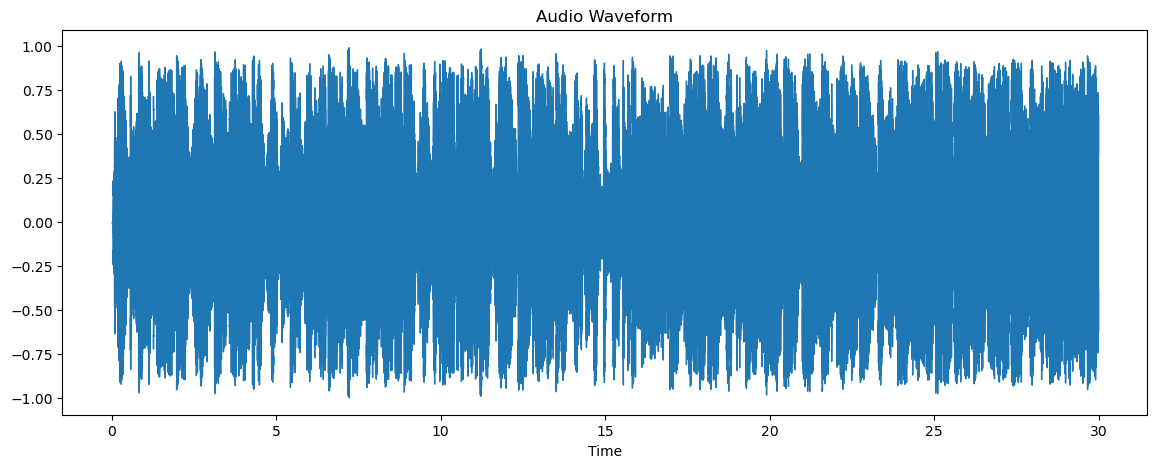

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.show()

In [9]:
y_harm, y_perc = librosa.effects.hpss(y)

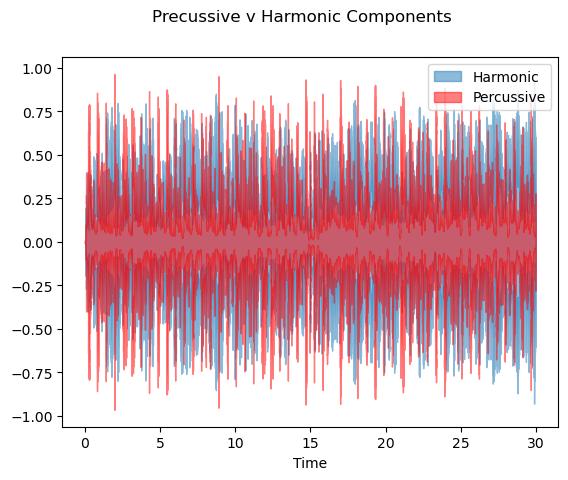

In [10]:
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, label='Percussive')
plt.legend()
plt.suptitle("Precussive v Harmonic Components");

In [11]:
from IPython.display import Audio

In [12]:
Audio(data=y_perc, rate=sr)

In [13]:
Audio(data=y_harm, rate=sr)

In [14]:
Audio(data=y_perc+y_harm,rate=sr)

## Graphs

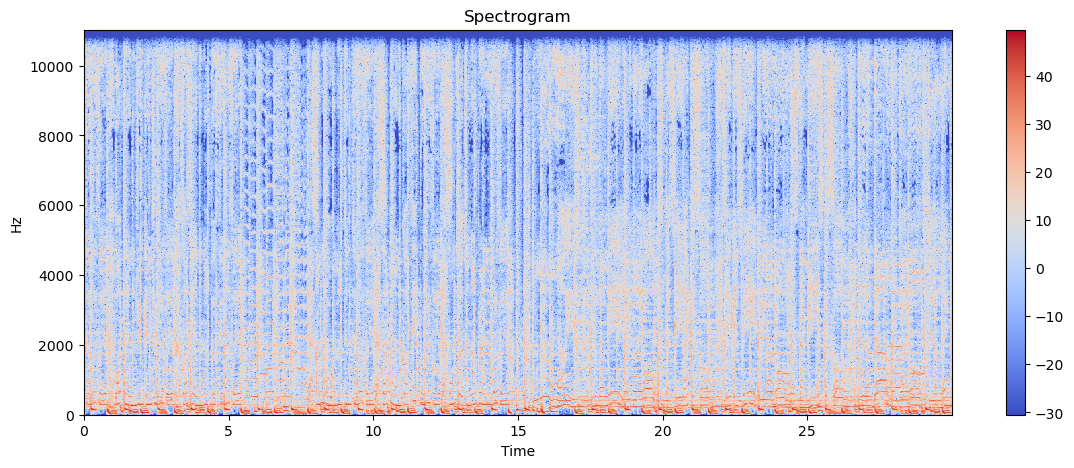

In [15]:
spectrogram = librosa.stft(y) 
S_db = librosa.amplitude_to_db(abs(spectrogram))

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

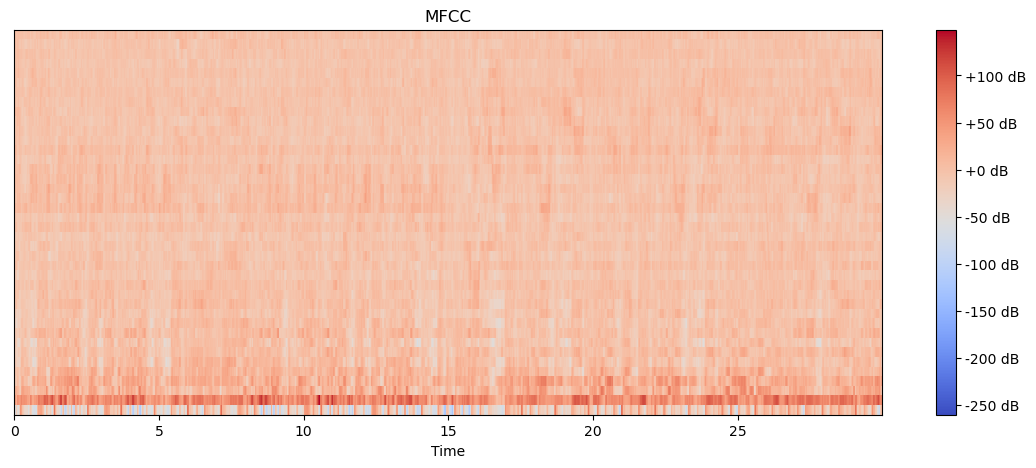

In [16]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

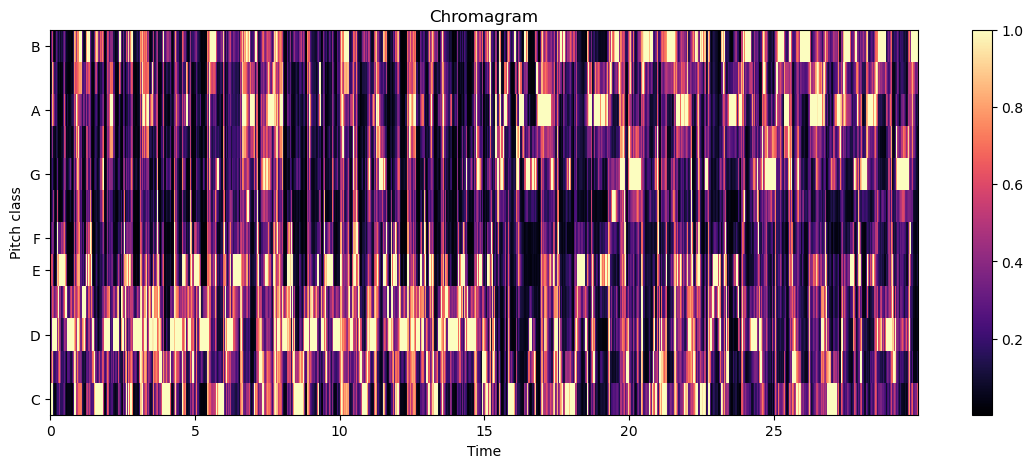

In [17]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr) 

plt.figure(figsize=(14, 5)) 
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

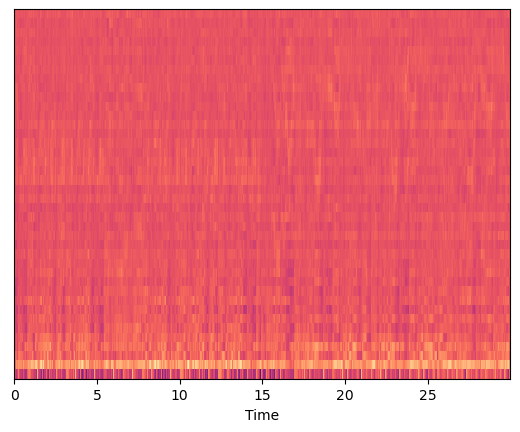

In [18]:
librosa.display.specshow(mfccs, x_axis='time', cmap='magma')